In [1]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
sns.set_style('ticks')
font = {
    'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 2,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

# Parse and plot spot instance prices

In [2]:
import pandas as pd
from datetime import datetime
import os

import pylab
def per_province_cases(df, provinces=None, cumulative=True,
                       log_scale=False):
    if provinces is None:
        provinces = sorted(list(set(list(df["denominazione_regione"]))))
    
    fig, ax = plt.subplots(figsize=(10,4))
    
    for province in provinces:
        per_province_df = df[df["denominazione_regione"] == province][
            ["data", "totale_casi"]
        ]
        grouped_per_province_df = per_province_df.groupby(
            "data").sum().reset_index()
        
        dates = list(grouped_per_province_df["data"])
        dates = [datetime.strptime(x, '%Y-%m-%dT%H:%M:%S') for x in dates]
        first_date = dates[0]
        total_cases = list(grouped_per_province_df["totale_casi"])
        print(province, total_cases)
        if not cumulative:
            total_cases = [0] + total_cases
            total_cases = [total_cases[i] - total_cases[i-1]
                           for i in range(1, len(total_cases))]
        
        ax.plot([(x - first_date).total_seconds() / (3600 * 24) for x in dates],
                total_cases, label=province)

    if cumulative:
        ax.set_ylabel("Number of\ntotal cases")
    else:
        ax.set_ylabel("Number of\nnew cases")
    ax.set_xlabel("Time (days)")
    if log_scale:
        ax.set_yscale('log')
        ax.set_xlim([5, None])
    else:
        ax.set_ylim([0, None])
        ax.set_xlim([0, None])
    sns.despine()

    leg = plt.figlegend(ncol=4, frameon=False, labelspacing=0.25,
                        columnspacing=0.8, handlelength=1.5,
                        loc='upper center')

    bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
    y_offset = 0.05
    bb.y0 += y_offset
    bb.y1 += y_offset
    leg.set_bbox_to_anchor(bb, transform=ax.transAxes)

    plt.show()

Lombardia [0, 240, 258, 403, 531, 615, 984, 1254, 1520, 1820, 2251, 2612, 3420, 4189, 5469, 5791, 7280, 8725, 9820, 11685, 13272, 14649, 16220, 17713, 19884, 22264, 25515, 27206, 28761, 30703, 32346, 34889, 37298, 39415, 41007, 42161, 43208, 44773, 46065, 47520, 49118, 50455, 51534, 52325, 53414, 54802, 56048, 57592, 59052, 60314, 61326, 62153, 63094, 64135, 65381, 66236, 66971, 67931, 69092, 70165, 71256, 71969, 72889, 73479, 74348, 75134, 75732, 76469, 77002, 77528, 78105, 78605, 79369, 80089, 80723, 81225, 81507, 81871, 82904, 83298, 83820, 84119, 84518, 84844, 85019, 85481, 85775, 86091, 86384, 86825, 87110, 87258, 87417, 87801, 88183, 88537, 88758, 88968, 89018, 89205, 89442, 89526, 89928, 90070, 90195, 90389, 90581, 90680, 90932, 91204, 91414, 91658, 91917, 92060, 92302, 92518, 92675, 92840, 92968, 93111, 93173, 93261, 93431, 93587, 93664, 93761, 93839, 93901, 94010, 94108, 94223, 94318, 94416, 94527, 94580, 94651, 94770, 94905, 94972, 95049, 95143, 95173, 95236, 95316, 95371, 95

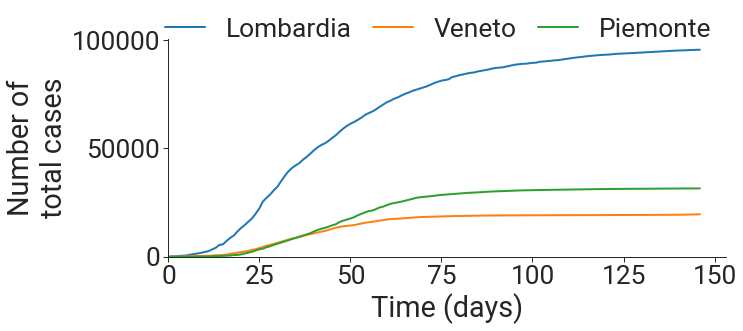

In [3]:
df = pd.read_csv("../data/italy_provinces.csv")
per_province_cases(df, provinces=["Lombardia", "Veneto", "Piemonte"])

Lombardia [0, 240, 258, 403, 531, 615, 984, 1254, 1520, 1820, 2251, 2612, 3420, 4189, 5469, 5791, 7280, 8725, 9820, 11685, 13272, 14649, 16220, 17713, 19884, 22264, 25515, 27206, 28761, 30703, 32346, 34889, 37298, 39415, 41007, 42161, 43208, 44773, 46065, 47520, 49118, 50455, 51534, 52325, 53414, 54802, 56048, 57592, 59052, 60314, 61326, 62153, 63094, 64135, 65381, 66236, 66971, 67931, 69092, 70165, 71256, 71969, 72889, 73479, 74348, 75134, 75732, 76469, 77002, 77528, 78105, 78605, 79369, 80089, 80723, 81225, 81507, 81871, 82904, 83298, 83820, 84119, 84518, 84844, 85019, 85481, 85775, 86091, 86384, 86825, 87110, 87258, 87417, 87801, 88183, 88537, 88758, 88968, 89018, 89205, 89442, 89526, 89928, 90070, 90195, 90389, 90581, 90680, 90932, 91204, 91414, 91658, 91917, 92060, 92302, 92518, 92675, 92840, 92968, 93111, 93173, 93261, 93431, 93587, 93664, 93761, 93839, 93901, 94010, 94108, 94223, 94318, 94416, 94527, 94580, 94651, 94770, 94905, 94972, 95049, 95143, 95173, 95236, 95316, 95371, 95

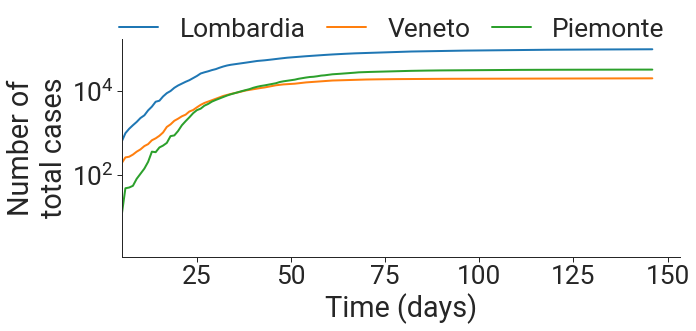

In [4]:
per_province_cases(df, provinces=["Lombardia", "Veneto", "Piemonte"],
                   log_scale=True)

Lombardia [0, 240, 258, 403, 531, 615, 984, 1254, 1520, 1820, 2251, 2612, 3420, 4189, 5469, 5791, 7280, 8725, 9820, 11685, 13272, 14649, 16220, 17713, 19884, 22264, 25515, 27206, 28761, 30703, 32346, 34889, 37298, 39415, 41007, 42161, 43208, 44773, 46065, 47520, 49118, 50455, 51534, 52325, 53414, 54802, 56048, 57592, 59052, 60314, 61326, 62153, 63094, 64135, 65381, 66236, 66971, 67931, 69092, 70165, 71256, 71969, 72889, 73479, 74348, 75134, 75732, 76469, 77002, 77528, 78105, 78605, 79369, 80089, 80723, 81225, 81507, 81871, 82904, 83298, 83820, 84119, 84518, 84844, 85019, 85481, 85775, 86091, 86384, 86825, 87110, 87258, 87417, 87801, 88183, 88537, 88758, 88968, 89018, 89205, 89442, 89526, 89928, 90070, 90195, 90389, 90581, 90680, 90932, 91204, 91414, 91658, 91917, 92060, 92302, 92518, 92675, 92840, 92968, 93111, 93173, 93261, 93431, 93587, 93664, 93761, 93839, 93901, 94010, 94108, 94223, 94318, 94416, 94527, 94580, 94651, 94770, 94905, 94972, 95049, 95143, 95173, 95236, 95316, 95371, 95

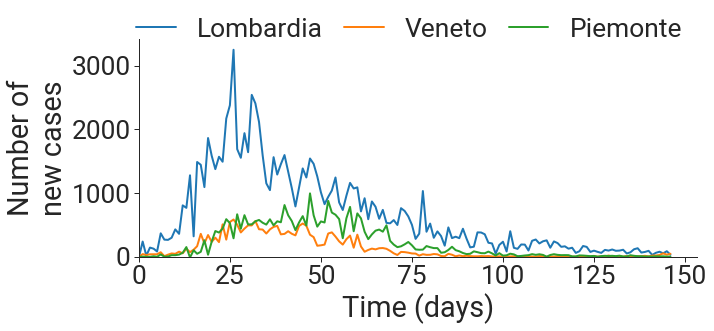

In [5]:
per_province_cases(df, provinces=["Lombardia", "Veneto", "Piemonte"],
                   cumulative=False)